# Analyse des films et séries de Netflix

## Import des données

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import sys
np.set_printoptions(threshold=sys.maxsize)

# path to dataset
NETFLIX_FILE = './netflix.csv'

df = pd.read_csv(NETFLIX_FILE)

In [3]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


## Répartition Films/Séries

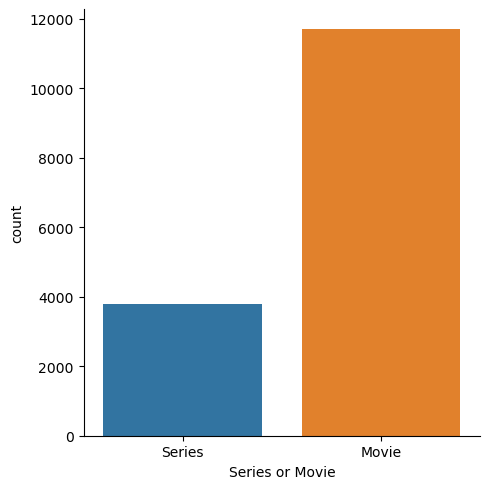

In [26]:
g = sns.catplot(data=df, kind="count", x="Series or Movie")
g.fig

## Sortie annuelles (sur Netflix)

In [27]:
ym = df["Netflix Release Date"].copy()

# slice pour garder année et mois
for i in range(len(ym)):
    ym[i] = ym[i][:-3]


0        2021-03
1        2021-03
2        2021-03
3        2021-03
4        2021-03
          ...   
15475    2015-04
15476    2015-04
15477    2015-04
15478    2015-04
15479    2015-04
Name: Netflix Release Date, Length: 15480, dtype: object

In [42]:
df_ym = pd.DataFrame({'Netflix Release Date': np.flip(ym.values)})
len(df_ym)

15480

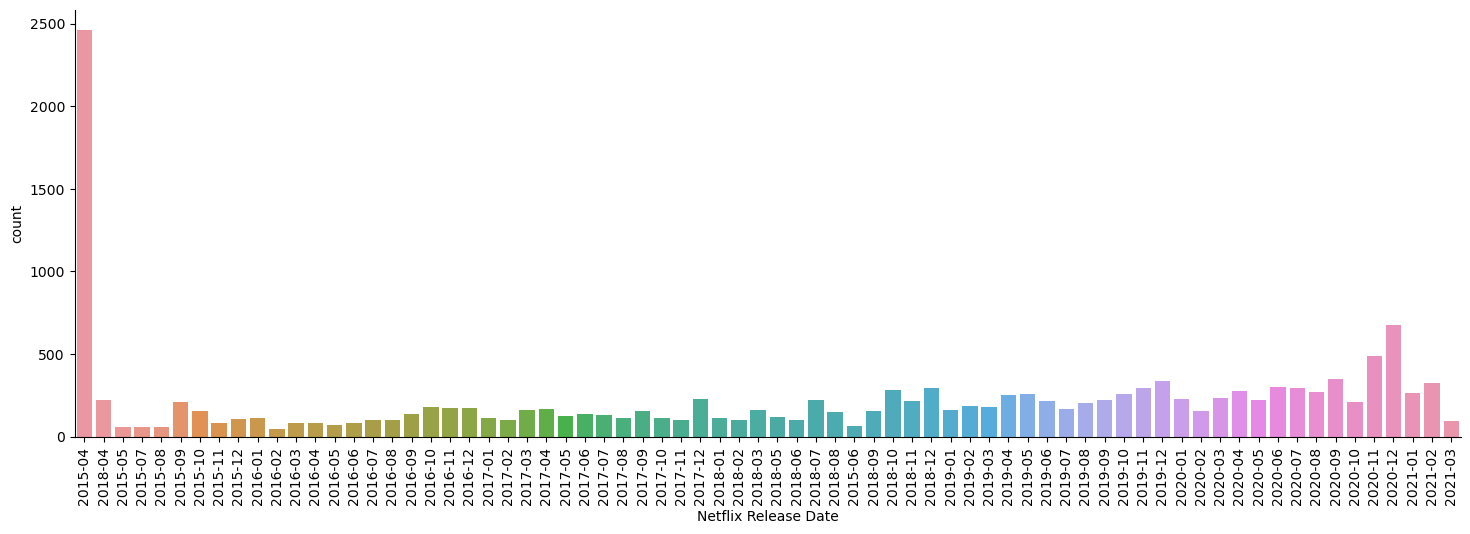

In [46]:
g = sns.catplot(data=df_ym, x="Netflix Release Date", kind="count", aspect=3)
g.set_xticklabels()
g.fig

## Retard entre la sortie en cinéma et la sortie sur Netflix

attention à filtrer

## Différentes notations suivants les organismes

Afficher les différentes notation suivant les organismes et suivant les genres

https://seaborn.pydata.org/examples/scatterplot_categorical.html

### Diagramme en boite sur les différents organismes

In [31]:
# Supprimer les lignes qui ne possèdent pas de genre
df_has_genre = df.dropna(subset=['Genre'])

# Normalisation des scores de notations (0 à 10)
# Hidden Gen Score OK
# IMDb Score OK
# Rotten Tomatoes 0 -- 100
# Metacritics 0 -- 100

df_has_genre['Rotten Tomatoes Score'] = df_has_genre['Rotten Tomatoes Score'].apply(lambda x : x/10)
df_has_genre['Metacritic Score'] = df_has_genre['Metacritic Score'].apply(lambda x : x/10)



/tmp/ipykernel_6478/2911137602.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_genre['Rotten Tomatoes Score'] = df_has_genre['Rotten Tomatoes Score'].apply(lambda x : x/10)
/tmp/ipykernel_6478/2911137602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_genre['Metacritic Score'] = df_has_genre['Metacritic Score'].apply(lambda x : x/10)


In [89]:
df_genre = df_has_genre['Genre'].str.split(', ')
df_imdb = pd.DataFrame(data={
  'Genre': df_genre,
  'IMDb Score': df_has_genre['IMDb Score']
})
df_imdb_ex = df_imdb.explode('Genre')
df_imdb_ex

,Genre,IMDb Score
0,Crime,7.9
0,Drama,7.9
0,Fantasy,7.9
0,Horror,7.9
0,Romance,7.9
...,...,...
15478,Family,6.4
15479,Animation,6.2
15479,Action,6.2
15479,Comedy,6.2


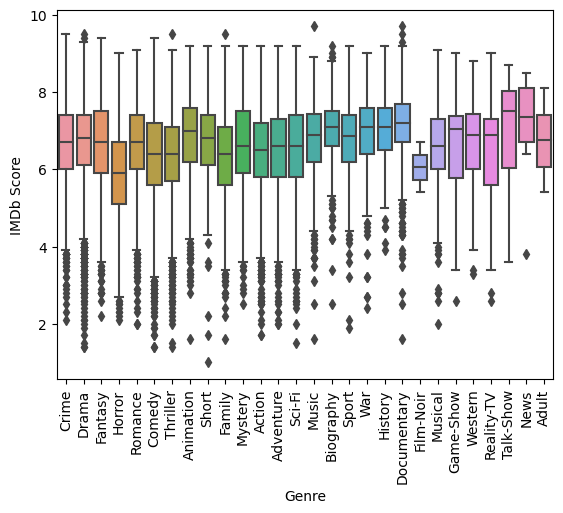

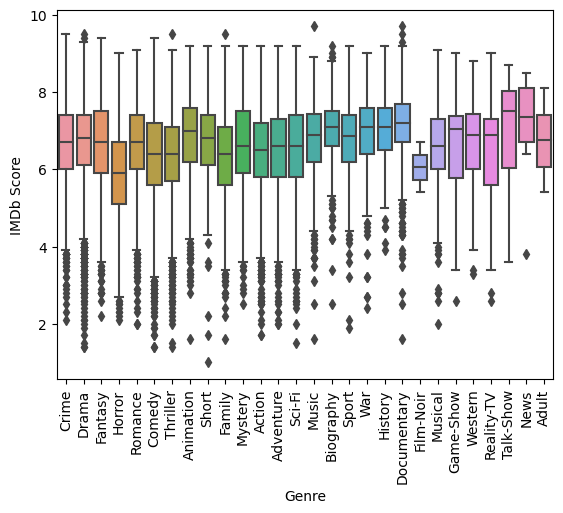

In [93]:
g = sns.boxplot(data=df_imdb_ex, x='Genre', y='IMDb Score')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.figure

#### Rotten Tomatoes

In [96]:
df_genre = df_has_genre['Genre'].str.split(', ')
df_rotten = pd.DataFrame(data={
  'Genre': df_genre,
  'Rotten Tomatoes Score': df_has_genre['Rotten Tomatoes Score']
})
df_rotten_ex = df_rotten.explode('Genre')
df_rotten_ex

,Genre,Rotten Tomatoes Score
0,Crime,9.8
0,Drama,9.8
0,Fantasy,9.8
0,Horror,9.8
0,Romance,9.8
...,...,...
15478,Family,NaN
15479,Animation,NaN
15479,Action,NaN
15479,Comedy,NaN


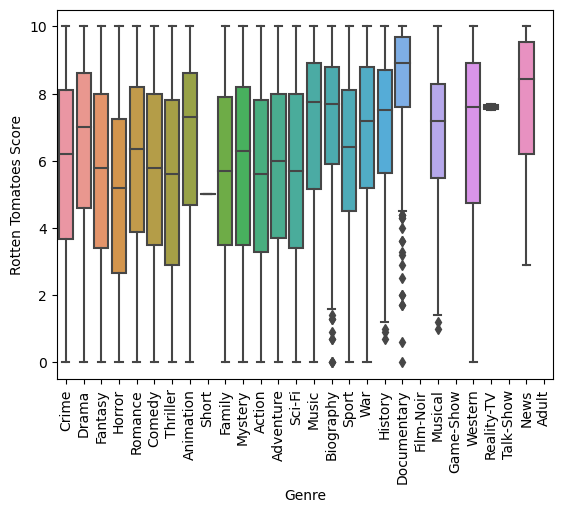

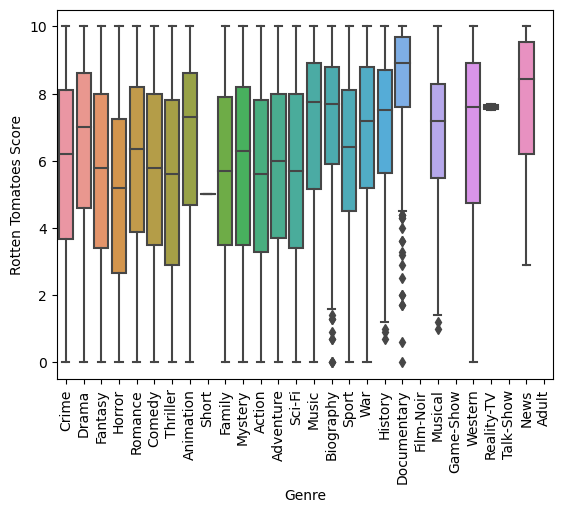

In [97]:
g = sns.boxplot(data=df_rotten_ex, x='Genre', y='Rotten Tomatoes Score')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.figure

#### Metacritics Score

In [99]:
df_genre = df_has_genre['Genre'].str.split(', ')
df_meta = pd.DataFrame(data={
  'Genre': df_genre,
  'Metacritic Score': df_has_genre['Metacritic Score']
})
df_meta_ex = df_meta.explode('Genre')
df_meta_ex

,Genre,Metacritic Score
0,Crime,8.2
0,Drama,8.2
0,Fantasy,8.2
0,Horror,8.2
0,Romance,8.2
...,...,...
15478,Family,NaN
15479,Animation,NaN
15479,Action,NaN
15479,Comedy,NaN


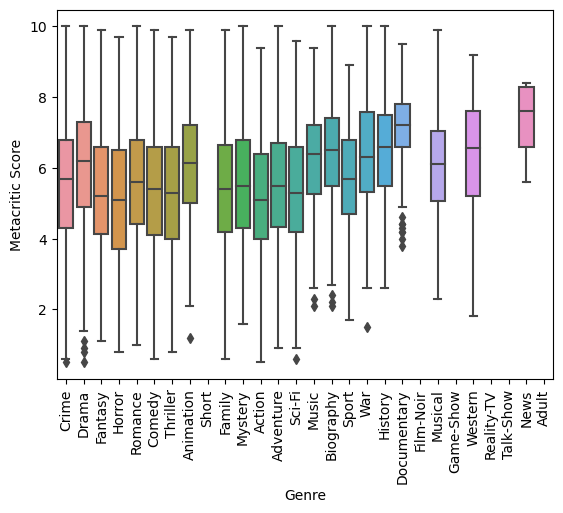

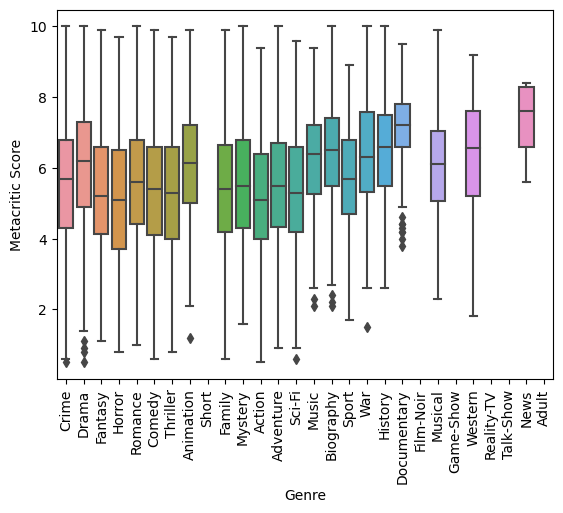

In [100]:
g = sns.boxplot(data=df_meta_ex, x='Genre', y='Metacritic Score')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.figure